<a href="https://colab.research.google.com/github/mohammad2682/AVR-EEPROM-/blob/master/Evalute_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
import keras
model = keras.models.load_model('gdrive/My Drive/COVID19.h5')

In [7]:
!ls gdrive/My\ Drive/

 Akradi_Mohamad_BspHw2.pdf	     'nuclear imaging course'
 Classroom			      shenasname.jpg
 CNN_Data			      signature.jpg
'Colab Notebooks'		     'Spotify-Accounts[RexWeb.info].gdoc'
 COVID19.h5			     'Tehran brhk program(1).pdf'
 ECG.jpg			      Test.gdoc
 fire-dataset			      Untitled0.ipynb
 fire_smoke_normallds.h5	     'Untitled document.gdoc'
'How to get started with Drive.pdf'  'Untitled form.gform'
 hw1-MohammadAkradi.pdf		     'Untitled spreadsheet.gsheet'
 ML-CNN.ipynb


In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 122, 122, 32)      4736      
_________________________________________________________________
dropout_9 (Dropout)          (None, 122, 122, 32)      0         
_________________________________________________________________
activation_3 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 64)        100416    
_________________________________________________________________
dropout_10 (Dropout)         (None, 55, 55, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 27, 27, 64)       

In [10]:
!git clone https://github.com/mohammad2682/Covid19-Dataset

Cloning into 'Covid19-Dataset'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2523 (delta 6), reused 0 (delta 0), pack-reused 2502
Receiving objects: 100% (2523/2523), 229.95 MiB | 13.49 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Checking out files: 100% (4965/4965), done.


In [71]:
import os
import pandas as pd
disease_types=['COVID', 'non-COVID']
data_dir = 'Covid19-Dataset/Covid-19-Dataset/train'
train_dir = os.path.join(data_dir)

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head(10)

,File,DiseaseID,Disease Type
0,COVID/Covid (378).png,0,COVID
1,COVID/Covid (105).png,0,COVID
2,COVID/Covid (690).png,0,COVID
3,COVID/Covid (749).png,0,COVID
4,COVID/Covid (147).png,0,COVID
5,COVID/Covid (614).png,0,COVID
6,COVID/Covid (1007).png,0,COVID
7,COVID/Covid (1133).png,0,COVID
8,COVID/Covid (449).png,0,COVID
9,COVID/Covid (1056).png,0,COVID


In [25]:
IMAGE_SIZE = 128
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [77]:
from tqdm import tqdm
import numpy as np
import cv2

X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
# Normalize the data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))

2000it [00:09, 220.31it/s]


Train Shape: (2000, 128, 128, 3)


In [33]:
from sklearn.model_selection import train_test_split

In [78]:
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot as plt

Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)

In [79]:
SEED=42
# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

Text(0.5, 145.31999999999996, 'Predicted')

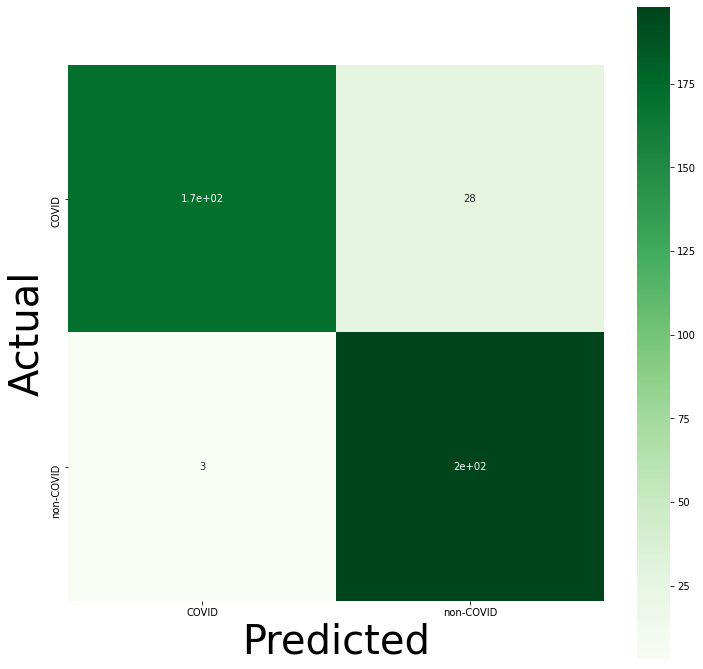

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [80]:
result = model.predict(X_val)
r = abs(np.round(result)-Y_val).sum()
(2000-r)/2000

0.969

In [31]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [91]:
# predict probabilities for test set
yhat_probs = model.predict(X_val, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(model.predict(X_val))

In [92]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
Y_val2 = Y_val[:,0]

## Evaluating with F1Score

In [93]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_val2, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_val2, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_val2, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_val2, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.922500
Precision: 0.982759
Recall: 0.859296
F1 score: 0.916890


## Evaluating with ROC & Kappa

In [94]:
# kappa
kappa = cohen_kappa_score(Y_val2, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_val2, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_val2, yhat_classes)
print(matrix)

# kappa
kappa = cohen_kappa_score(Y_val2, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Y_val2, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_val2, yhat_classes)
print(matrix)

Cohens kappa: 0.844899
ROC AUC: 0.983200
[[198   3]
 [ 28 171]]
Cohens kappa: 0.844899
ROC AUC: 0.983200
[[198   3]
 [ 28 171]]
